In [1]:
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [2]:
[features, scaled_features] = np.load('../processed_data/features_video_2.npy', allow_pickle=True)
with open('../realtime_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

C:\Users\Yttri-Lab\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Yttri-Lab\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### place side-by-side to visualize pattern

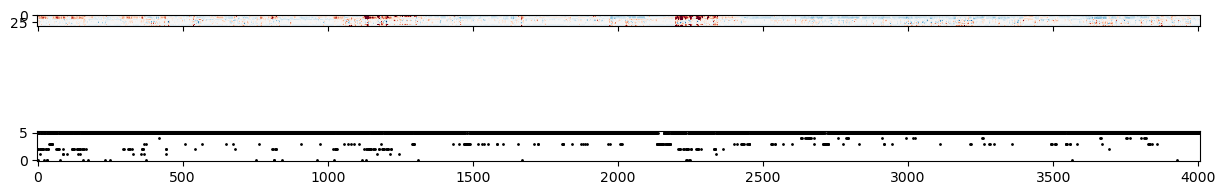

In [5]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [7]:
predictions[:50]

array([0., 0., 0., 0., 0., 0., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 5., 2., 2., 5., 5., 5., 5., 1., 1., 5., 1., 1., 1., 1., 1.])

In [8]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([ 208,  112,  468,  574,  191, 1455], dtype=int64))

### Save processed file

In [9]:
np.save('../processed_data/predict_video_2.npy', predictions)